# Ha-Oiii temperature from 70 micron slits

The results I had before from the interpolated PV diagram was spurious. So I am going back to the individual spectra. 

In [1]:
from pathlib import Path
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy import constants
import astropy.units as u
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
datadir = Path.cwd().parent / "data/originals"
_files = sorted(datadir.glob("crN1004*.fits"))
[_.stem for _ in _files]

['crN10042_b', 'crN10043_bx', 'crN10045_bx-oiii', 'crN10047o']

## Extract 1d Ha line profile

### Read files and set up wavelength and velocity scale

In [3]:
hdu = fits.open(_files[1])[0]

In [4]:
w = WCS(hdu.header)
ny, nx = hdu.data.shape
_, waves = w.pixel_to_world_values([0]*ny, np.arange(ny))
offsets, _ = w.pixel_to_world_values(np.arange(nx), [0]*nx)

In [5]:
light_speed_kms = constants.c.to_value(u.km / u.s)
wave0 = 6562.78
vels = light_speed_kms * (waves - wave0) / wave0

### Remove the ISM line

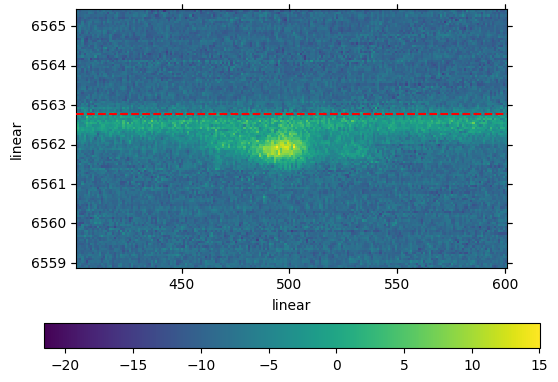

In [6]:
# wav_window = slice(330, 390)
# pos_window = slice(440, 560)
# convert to default float since fits image was big endian
im = hdu.data.astype("float")
# bg = p(pixels)[wav_window, None]
# im -= bg
fig, ax = plt.subplots(subplot_kw=dict(projection=w))
_ = ax.imshow(im, interpolation="none")
ax.set_xlim(400, 600)
ax.set_ylim(300, 420)
x0, y0 = w.world_to_pixel_values(0, wave0)
ax.axhline(y0, color="r", ls="dashed")
fig.colorbar(_, ax=ax, orientation="horizontal")

In [7]:
bg = np.median(im, axis=1, keepdims=True)

In [8]:
i1, i2 = 487, 507

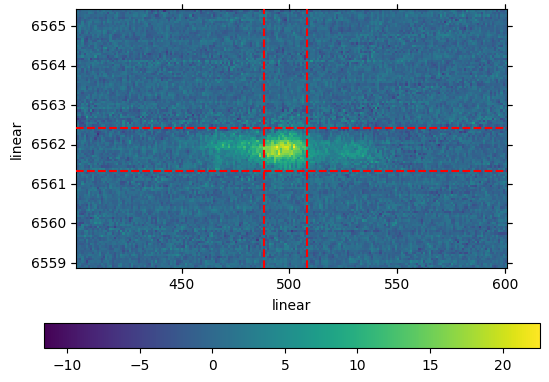

In [9]:
fig, ax = plt.subplots(subplot_kw=dict(projection=w))
_ = ax.imshow(im - bg, interpolation="none")
ax.set_xlim(400, 600)
ax.set_ylim(300, 420)
x0, y0 = w.world_to_pixel_values(0, wave0)
ax.axhline(345, color="r", ls="dashed")
ax.axhline(365, color="r", ls="dashed")
ax.axvline(i1, color="r", ls="dashed")
ax.axvline(i2, color="r", ls="dashed")
fig.colorbar(_, ax=ax, orientation="horizontal")

In [10]:
noise_var = 1.6 + 0.17 * im
imm = im - bg

### Spatial profile

/var/folders/0q/3pcjvc3n6sn2wk6g8ck6ry300000gn/T/ipykernel_54540/648554037.py:5: RuntimeWarning: invalid value encountered in sqrt
  sprofile = np.sqrt(np.sum(noise_var[yslice, :], axis=0))


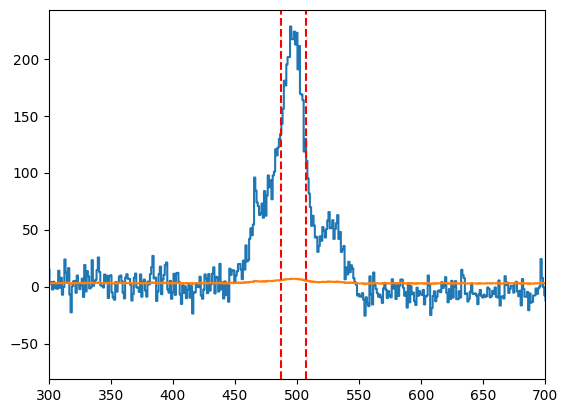

In [11]:
fig, ax = plt.subplots()
yslice = slice(345, 365)
# yslice = slice(350, 360)
profile = np.sum(imm[yslice, :], axis=0)
sprofile = np.sqrt(np.sum(noise_var[yslice, :], axis=0))
ds = "steps-mid"             
ax.plot(offsets, profile, ds=ds)
ax.plot(offsets, sprofile, ds=ds)
# ax.fill_between(offsets, profile + sprofile, profile - sprofile)
ax.set_xlim(300, 700)
ax.axvline(i1, color="r", ls="dashed")
ax.axvline(i2, color="r", ls="dashed")

In [12]:
np.std(profile[300:450]), np.mean(profile[300:450])

(9.326378734745425, 2.7024016467109324)

In [13]:
np.nanmean(sprofile[300:450])

3.08519937157776

In [14]:
np.nanstd(imm[yslice, 300:450]), np.nanmean(imm[yslice, 300:450])

(1.602172638731623, 0.13512008233554662)

### Line profile

/var/folders/0q/3pcjvc3n6sn2wk6g8ck6ry300000gn/T/ipykernel_54540/551844711.py:6: RuntimeWarning: invalid value encountered in sqrt
  sprofile = np.sqrt(np.sum(noise_var[:, xslice], axis=1))


(6555.0, 6570.0)

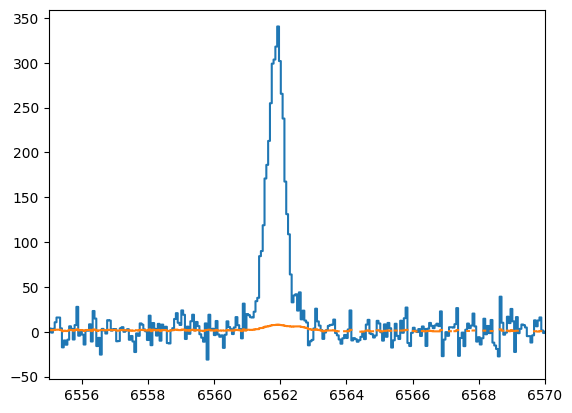

In [15]:
fig, ax = plt.subplots()
yslice = slice(345, 365)
xslice = slice(i1, i2)
# yslice = slice(350, 360)
profile = np.sum(imm[:, xslice], axis=1)
sprofile = np.sqrt(np.sum(noise_var[:, xslice], axis=1))
ds = "steps-mid"             
ax.plot(waves, profile, ds=ds)
ax.plot(waves, sprofile, ds=ds)
ax.set_xlim(6555, 6570)

(-150.0, 150.0)

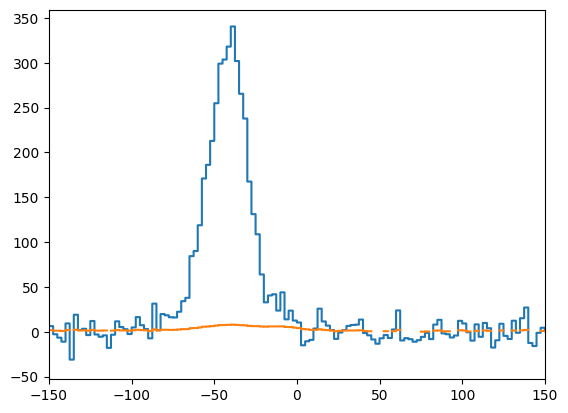

In [16]:
fig, ax = plt.subplots()
ax.plot(vels, profile, ds=ds)
ax.plot(vels, sprofile, ds=ds)
ax.set_xlim(-150, 150)

In [17]:
window = (vels > -100) & (vels < 0)
vmean_ha = np.average(vels[window], weights=profile[window])
vmean_ha

-42.188711916566845

In [18]:
idata, vdata = {}, {}

In [19]:
idata["ha"] = profile / np.sum(profile[window])
vdata["ha"] = vels - vmean_ha


## Extract 1d Oiii profile

### Read files and set up wavelength and velocity scale

In [20]:
hdu = fits.open(_files[2])[0]

In [21]:
w = WCS(hdu.header)
ny, nx = hdu.data.shape
_, waves = w.pixel_to_world_values([0]*ny, np.arange(ny))
offsets, _ = w.pixel_to_world_values(np.arange(nx), [0]*nx)

In [22]:
light_speed_kms = constants.c.to_value(u.km / u.s)
wave0 = 5006.8
vels = light_speed_kms * (waves - wave0) / wave0

### Remove the ISM line

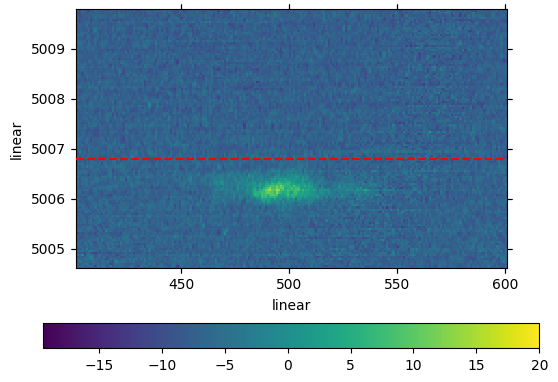

In [23]:
# convert to default float since fits image was big endian
im = hdu.data.astype("float")
fig, ax = plt.subplots(subplot_kw=dict(projection=w))
_ = ax.imshow(im, interpolation="none", vmax=20)
ax.set_xlim(400, 600)
ax.set_ylim(300, 420)
x0, y0 = w.world_to_pixel_values(0, wave0)
ax.axhline(y0, color="r", ls="dashed")
fig.colorbar(_, ax=ax, orientation="horizontal")

In [24]:
bg = np.median(im, axis=1, keepdims=True)

In [25]:
i1, i2 = 487, 507

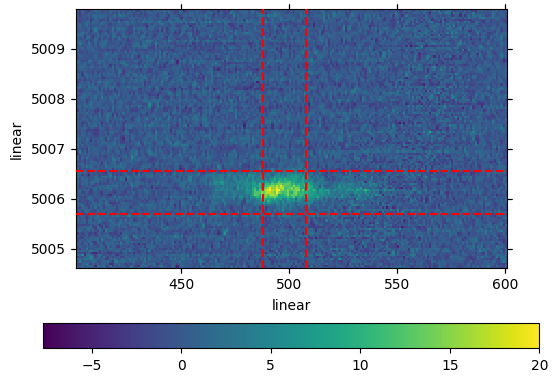

In [26]:
fig, ax = plt.subplots(subplot_kw=dict(projection=w))
_ = ax.imshow(im - bg, interpolation="none", vmax=20)
ax.set_xlim(400, 600)
ax.set_ylim(300, 420)
x0, y0 = w.world_to_pixel_values(0, wave0)
ax.axhline(325, color="r", ls="dashed")
ax.axhline(345, color="r", ls="dashed")
ax.axvline(i1, color="r", ls="dashed")
ax.axvline(i2, color="r", ls="dashed")
fig.colorbar(_, ax=ax, orientation="horizontal")

In [27]:
noise_var = 1.6 + 0.17 * im
imm = im - bg

### Spatial profile

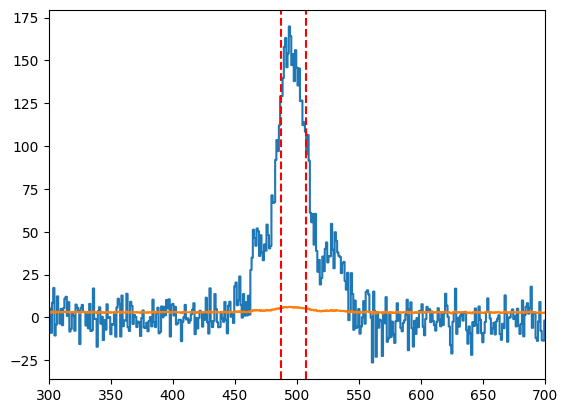

In [28]:
fig, ax = plt.subplots()
yslice = slice(325, 345)
# yslice = slice(350, 360)
profile = np.sum(imm[yslice, :], axis=0)
sprofile = np.sqrt(np.sum(noise_var[yslice, :], axis=0))
ds = "steps-mid"             
ax.plot(offsets, profile, ds=ds)
ax.plot(offsets, sprofile, ds=ds)
# ax.fill_between(offsets, profile + sprofile, profile - sprofile)
ax.set_xlim(300, 700)
ax.axvline(i1, color="r", ls="dashed")
ax.axvline(i2, color="r", ls="dashed")

In [29]:
np.std(profile[300:450]), np.mean(profile[300:450])

(7.128583680442333, 0.3124381017684936)

In [30]:
np.nanmean(sprofile[300:450])

3.009991714265315

In [31]:
np.nanstd(imm[yslice, 300:450]), np.nanmean(imm[yslice, 300:450])

(1.463515299408126, 0.015621905088424683)

### Line profile

/var/folders/0q/3pcjvc3n6sn2wk6g8ck6ry300000gn/T/ipykernel_54540/1846245743.py:7: RuntimeWarning: invalid value encountered in sqrt
  sprofile = np.sqrt(np.sum(noise_var[:, xslice], axis=1))


(5000.0, 5015.0)

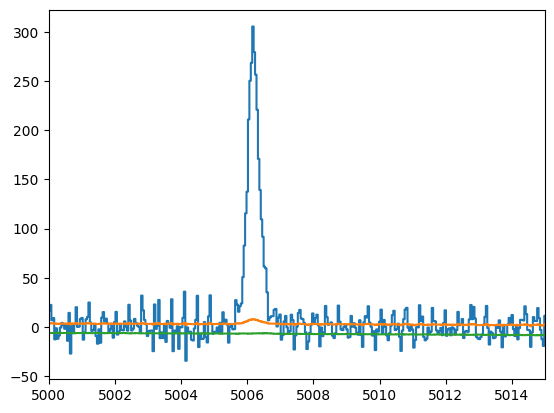

In [32]:
fig, ax = plt.subplots()
yslice = slice(325, 345)
xslice = slice(i1, i2)
# yslice = slice(350, 360)
profile = np.sum(imm[:, xslice], axis=1)
profile0 = np.sum(im[:, xslice], axis=1)
sprofile = np.sqrt(np.sum(noise_var[:, xslice], axis=1))
ds = "steps-mid"             
ax.plot(waves, profile, ds=ds)
ax.plot(waves, sprofile, ds=ds)
ax.plot(waves, bg, ds=ds)
ax.set_xlim(5000, 5015)

(-150.0, 150.0)

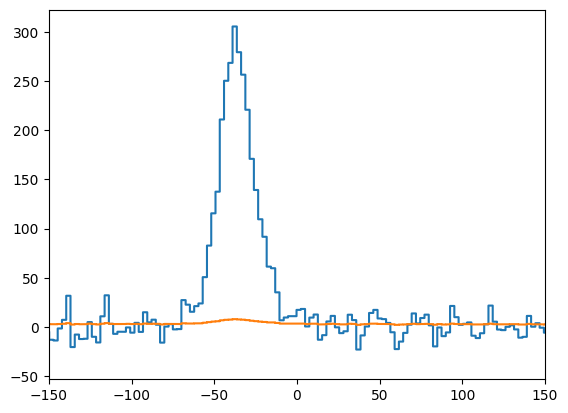

In [33]:
fig, ax = plt.subplots()
ax.plot(vels, profile, ds=ds)
ax.plot(vels, sprofile, ds=ds)
ax.set_xlim(-150, 150)

In [34]:
window = (vels > -100) & (vels < 0)
vmean_oiii = np.average(vels[window], weights=profile[window])
vmean_oiii

-36.407181951277096

In [35]:
idata["oiii"] = profile / np.sum(profile[window])
vdata["oiii"] = vels - vmean_oiii

## Compare two lines

(-70.0, 70.0)

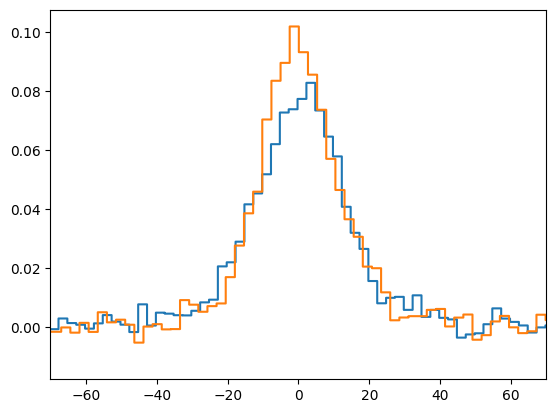

In [37]:
fig, ax = plt.subplots()
ax.plot(vdata["ha"], idata["ha"], ds=ds)
ax.plot(vdata["oiii"], idata["oiii"], ds=ds)
ax.set_xlim(-70, 70)

In [41]:
np.diff(vdata["oiii"])[0], np.diff(vdata["ha"])[0]

(2.579591702433163, 2.498936314386242)

In [42]:
np.diff(vdata["oiii"])[0] / np.diff(vdata["ha"])[0]

1.0322758877777687

Fit single Gaussians